## Details

The purpose of this task is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Drug consumption". You can find more information here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.

In [1]:
%%javascript
// disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import seaborn as sn

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import pairwise_distances

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task.

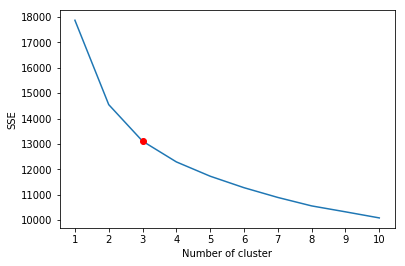


From the above graph, it is clear the the best value of k would be 3.


In [3]:
#########################begin code for Task 1-a
# Read input data file
df = pd.read_csv("drug_users.csv")

K = range(1,11)
# Calculate sum of squared errors
sse = {}
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    sse[k] = kmeanModel.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.plot(3, sse.get(3), 'ro')
plt.xticks(np.arange(min(sse.keys()), max(sse.keys())+1, 1.0))
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

print("\nFrom the above graph, it is clear the the best value of k would be 3.")

#########################end code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [4]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(df.drop('CLASS', axis=1),df.CLASS,test_size=0.3)
###################end code for Task 1-b-1

**Note: Output will vary every time based on the split of the train and test data.


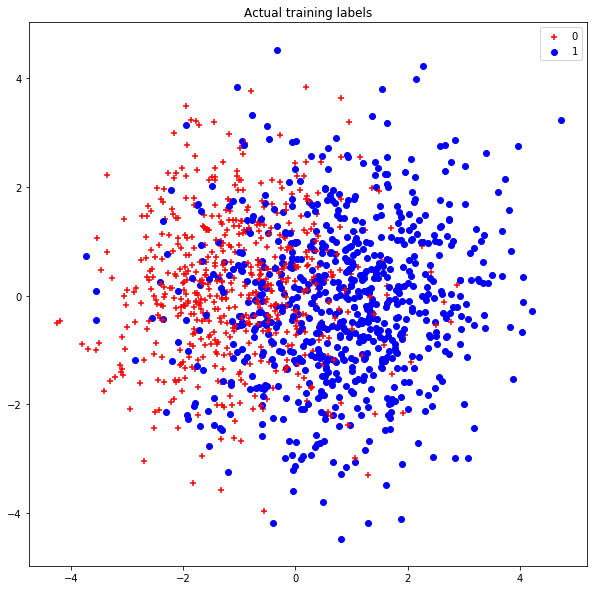

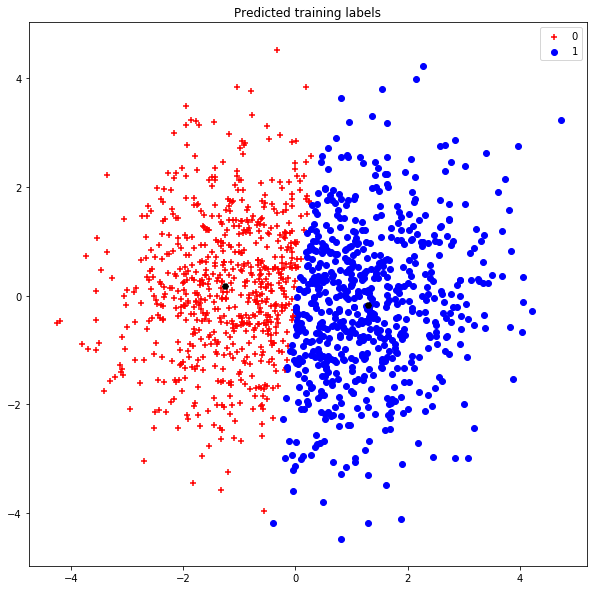

In [5]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(x_train)

# Create the KMeans model
kmeanTrainModel = KMeans(n_clusters=2)

# Compute cluster centers and predict cluster index for each sample 
X_train_fit = kmeanTrainModel.fit(X_train_pc)
X_train_pca = X_train_fit.predict(X_train_pc)
centers = kmeanTrainModel.cluster_centers_

print("**Note: Output will vary every time based on the split of the train and test data.")

# Visualize the actual training labels. 
pl.figure(figsize=(10,10))
for i in range(0, X_train_pc.shape[0]):
    if y_train.reset_index().CLASS[i] == 0:
        c1 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='r',
        marker='+')
    else:
        c2 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='b',
        marker='o')


pl.legend([c1, c2], ['0', '1'])
pl.title('Actual training labels')
pl.show()

# Visualize the predicted training labels.
pl.figure(figsize=(10,10))
for i in range(0, X_train_pc.shape[0]):
    if X_train_pca[i] == 0:
        c1 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='r',
        marker='+')
    else:
        c2 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='b',
        marker='o')
        
pl.scatter(centers[0][0],centers[0][1],c='black',marker='H')
pl.scatter(centers[1][0],centers[1][1],c='black',marker='H')  
pl.legend([c1, c2], ['0', '1'])
pl.title('Predicted training labels')
pl.show()

###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels.

**Note: Output will vary every time based on the split of the train and test data.


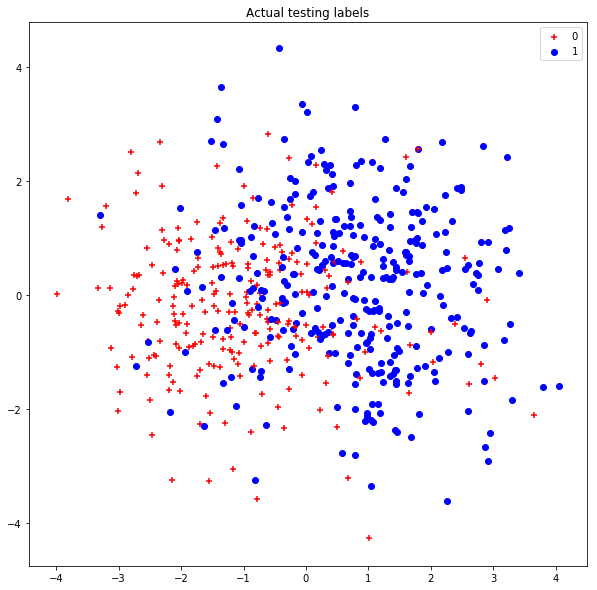

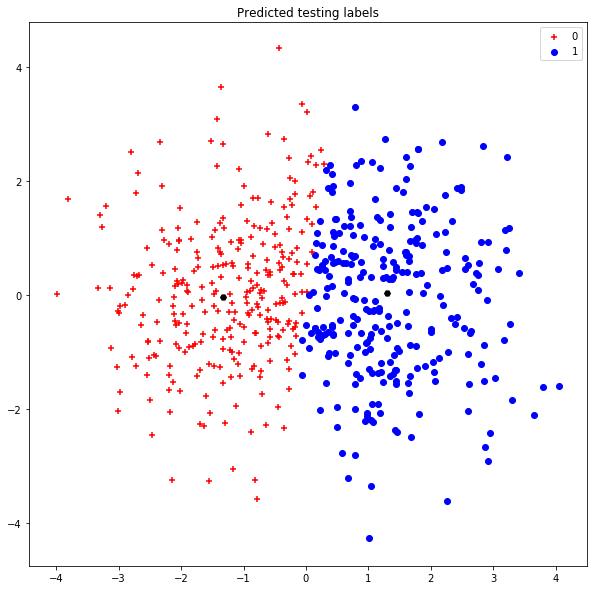

In [6]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_test_pc = pca.fit_transform(x_test)

# Create the KMeans model
kmeanTestModel = KMeans(n_clusters=2)

# Compute cluster centers and predict cluster index for each sample 
X_test_fit = kmeanTestModel.fit(X_test_pc)
X_test_pca = X_train_fit.predict(X_test_pc)
centers = kmeanTestModel.cluster_centers_

print("**Note: Output will vary every time based on the split of the train and test data.")

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)

pl.figure(figsize=(10,10))
for i in range(0, X_test_pc.shape[0]):
    if y_test.reset_index().CLASS[i] == 0:
        c1 = pl.scatter(X_test_pc[i,0],X_test_pc[i,1],c='r',
        marker='+')
    else:
        c2 = pl.scatter(X_test_pc[i,0],X_test_pc[i,1],c='b',
        marker='o')


pl.legend([c1, c2], ['0', '1'])
pl.title('Actual testing labels')
pl.show()


pl.figure(figsize=(10,10))
for i in range(0, X_test_pc.shape[0]):
    if X_test_pca[i] == 0:
        c1 = pl.scatter(X_test_pc[i,0],X_test_pc[i,1],c='r',
        marker='+')
    else:
        c2 = pl.scatter(X_test_pc[i,0],X_test_pc[i,1],c='b',
        marker='o')
        
pl.scatter(centers[0][0],centers[0][1],c='black',marker='H')
pl.scatter(centers[1][0],centers[1][1],c='black',marker='H')  
pl.legend([c1, c2], ['0', '1'])
pl.title('Predicted testing labels')
pl.show()


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

**Note: Output will vary every time based on the split of the train and test data.

Confusion Matrix

[[200  46]
 [ 82 238]]


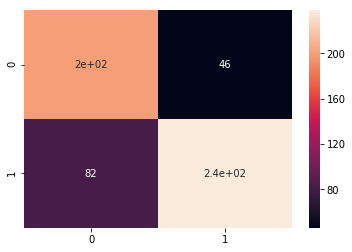

In [7]:
###################begin code for Task 1-b-4: Print out a confusion matrix

# Create the KMeans model
kmean = KMeans(n_clusters=2)

# Fit the data into model and predict the output
kmean.fit(x_train, y_train)
y_pred = kmean.predict(x_test)
report = confusion_matrix(y_test, y_pred)

print("**Note: Output will vary every time based on the split of the train and test data.\n")

print("Confusion Matrix\n")
print(report)
sn.heatmap(report, annot=True)
plt.show()
###################end code for Task 1-b-4

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [8]:
###################begin code for Task 2-a: Print out a confusion matrix

bestModel = {}

## Calculate pairwise distance matrix for X_train
pdm_train_c = pairwise_distances(x_train,metric='cosine')
pdm_train_e = pairwise_distances(x_train,metric='euclidean')
pdm_train_m = pairwise_distances(x_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
clusterCC = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
a_predCC = clusterCC.fit_predict(pdm_train_c)
matrixA = f1_score(y_train, a_predCC)
bestModel.update( {'cosine-complete' : matrixA} )

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
clusterEC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
a_predEC = clusterEC.fit_predict(pdm_train_e)
matrixB = f1_score(y_train, a_predEC)
bestModel.update( {'euclidean-complete' : matrixB} )

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
clusterMC = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
a_predMC = clusterMC.fit_predict(pdm_train_m)
matrixC = f1_score(y_train, a_predMC) 
bestModel.update( {'manhattan-complete' : matrixC} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
clusterCA = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
a_predCA = clusterCA.fit_predict(pdm_train_c)
matrixD = f1_score(y_train, a_predCA)
bestModel.update( {'cosine-average' : matrixD} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
clusterEA = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
a_predEA = clusterEA.fit_predict(pdm_train_e)
matrixE = f1_score(y_train, a_predEA)
bestModel.update( {'euclidean-average' : matrixE} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
clusterMA = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
a_predMA = clusterMA.fit_predict(pdm_train_m)
matrixF = f1_score(y_train, a_predMA)
bestModel.update( {'manhattan-average' : matrixF} )

print("**Note: Output will vary every time based on the split of the train and test data.\n")
print("F1-score for complete linkage + cosine", round((matrixA*100),2))
print("F1-score for complete linkage + euclidean", round((matrixB*100),2))
print("F1-score for complete linkage + manhattan", round((matrixC*100),2))
print("F1-score for average linkage + cosine", round((matrixD*100),2))
print("F1-score for average linkage + euclidean", round((matrixE*100),2))
print("F1-score for average linkage + manhattan", round((matrixF*100),2))

# Dynamically fetch the maximum F-1 value from the dictionary
maximum = max(bestModel.items(), key=lambda k: k[1])
maximumPair = maximum[0].split('-')
print("\nFrom the above values, it is clear that best model of linkage method is:",maximumPair[0]," & ",maximumPair[1])

###################end code for Task 2-a

C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed di

**Note: Output will vary every time based on the split of the train and test data.

F1-score for complete linkage + cosine 77.84
F1-score for complete linkage + euclidean 69.34
F1-score for complete linkage + manhattan 69.0
F1-score for average linkage + cosine 27.62
F1-score for average linkage + euclidean 67.31
F1-score for average linkage + manhattan 0.0

From the above values, it is clear that best model of linkage method is: cosine  &  complete


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


**Note: Output will vary every time based on the split of the train and test data.


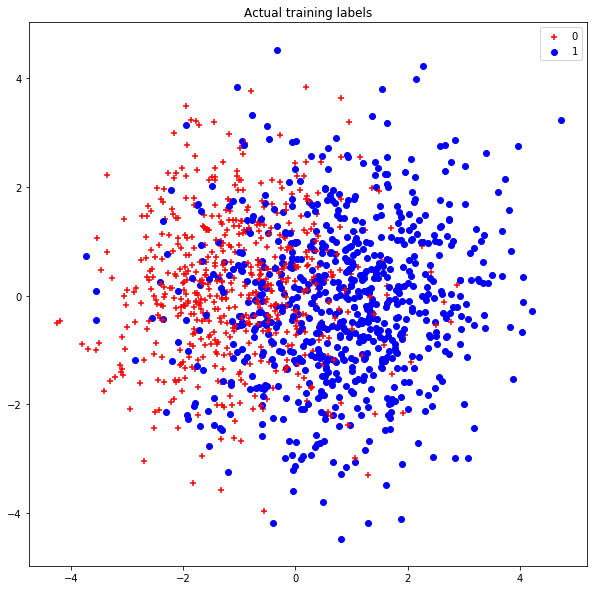

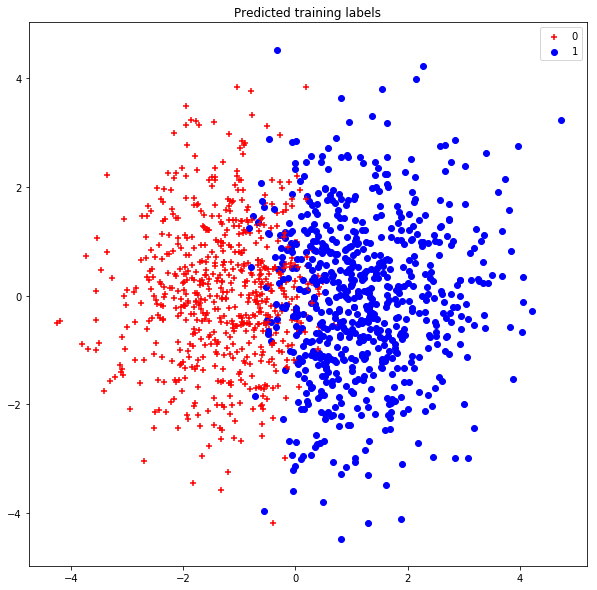

In [9]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

# Create PCA model
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(x_train)

# Use best Agglomerative model obtain from task 2-a
pdm_data = pairwise_distances(x_train, metric=maximumPair[0])
cluster = AgglomerativeClustering(n_clusters=2, affinity=maximumPair[0], linkage=maximumPair[1])

# Fit the data into model and predict the output
X_train_pca = cluster.fit_predict(pdm_data)

print("**Note: Output will vary every time based on the split of the train and test data.")

# Visualize the actual training labels. 
pl.figure(figsize=(10,10))
for i in range(0, X_train_pc.shape[0]):
    if y_train.reset_index().CLASS[i] == 0:
        c1 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='r',
        marker='+')
    else:
        c2 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='b',
        marker='o')

        
pl.legend([c1, c2], ['0', '1'])
pl.title('Actual training labels')
pl.show()

# Visualize the predicted training labels. 
pl.figure(figsize=(10,10))
for i in range(0, X_train_pc.shape[0]):
    if X_train_pca[i] == 0:
        c1 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='r',
        marker='+')
    else:
        c2 = pl.scatter(X_train_pc[i,0],X_train_pc[i,1],c='b',
        marker='o')
        
pl.legend([c1, c2], ['0', '1'])
pl.title('Predicted training labels')
pl.show()
###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


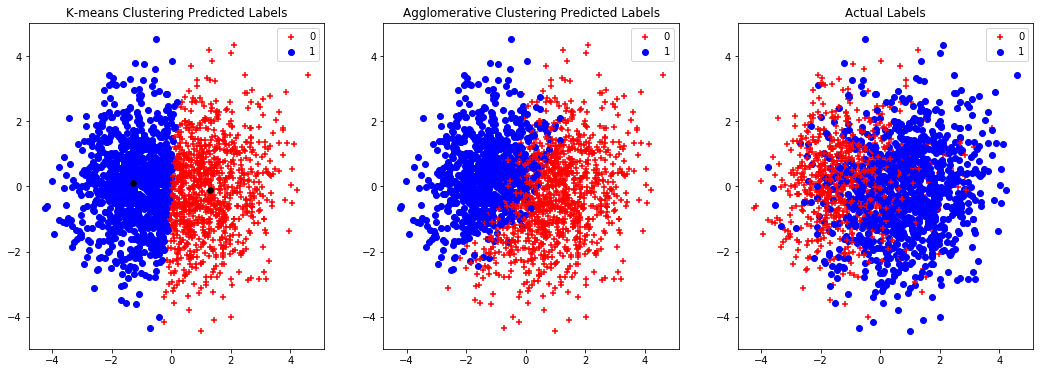

In [10]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

# Create PCA model to visualize the actual labels.
pca = PCA(n_components=2)
data = pca.fit_transform(df.drop('CLASS', axis=1))

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeanModel = KMeans(n_clusters=2)
X_data_fit = kmeanModel.fit_predict(data)
centers = kmeanModel.cluster_centers_

# Create the plot with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Visualize the predicted Kmeans labels. 
for i in range(0, data.shape[0]):
    if X_data_fit[i] == 0:
        c1 = ax1.scatter(data[i,0],data[i,1],c='r',
        marker='+')
    else:
        c2 = ax1.scatter(data[i,0],data[i,1],c='b',
        marker='o')
        
ax1.scatter(centers[0][0],centers[0][1],c='black',marker='H')
ax1.scatter(centers[1][0],centers[1][1],c='black',marker='H')  
ax1.legend([c1, c2], ['0', '1'])
ax1.set_title('K-means Clustering Predicted Labels')


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_data = pairwise_distances(df.drop('CLASS', axis=1),metric=maximumPair[0])

# Model and fit the data to the   (use fit_predict : Performs clustering on X and returns cluster labels.)
cluster = AgglomerativeClustering(n_clusters=2, affinity=maximumPair[0], linkage=maximumPair[1])  
X_data = cluster.fit_predict(pdm_data)

# Visualize the predicted Agglomerative labels. 
for i in range(0, data.shape[0]):
    if X_data[i] == 0:
        c1 = ax2.scatter(data[i,0],data[i,1],c='r',
        marker='+')
    else:
        c2 = ax2.scatter(data[i,0],data[i,1],c='b',
        marker='o')
        

ax2.legend([c1, c2], ['0', '1'])
ax2.set_title('Agglomerative Clustering Predicted Labels')


# Visualize the Actual labels. 
for i in range(0, data.shape[0]):
    if df.CLASS[i] == 0:
        c1 = ax3.scatter(data[i,0],data[i,1],c='r',
        marker='+')
    else:
        c2 = ax3.scatter(data[i,0],data[i,1],c='b',
        marker='o')


ax3.legend([c1, c2], ['0', '1'])
ax3.set_title('Actual Labels')
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model.

In [11]:
###################begin code for Task 3-b
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df.drop('CLASS', axis=1),df.CLASS)
X_data_pred = kmeanModel.predict(df.drop('CLASS', axis=1))
print("\nConfusion Matrix for K-Means Model\n")
print(confusion_matrix(df.CLASS, X_data_pred))
print("\nClassification Report for K-Means Model\n")
print(classification_report(df.CLASS, X_data_pred))

pdm_data = pairwise_distances(df,metric="cosine")
cluster = AgglomerativeClustering(n_clusters=2, affinity="cosine", linkage="average")  
X_data = cluster.fit_predict(pdm_data)
print("Confusion Matrix for Hierarchical Agglomerative Model\n")
print(confusion_matrix(df.CLASS, X_data))
print("\nClassification Report for Hierarchical Agglomerative Model\n")
print(classification_report(df.CLASS, X_data))

###################end code for Task 3-b


Confusion Matrix for K-Means Model

[[683 157]
 [272 773]]

Classification Report for K-Means Model

             precision    recall  f1-score   support

          0       0.72      0.81      0.76       840
          1       0.83      0.74      0.78      1045

avg / total       0.78      0.77      0.77      1885



C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Confusion Matrix for Hierarchical Agglomerative Model

[[764  76]
 [329 716]]

Classification Report for Hierarchical Agglomerative Model

             precision    recall  f1-score   support

          0       0.70      0.91      0.79       840
          1       0.90      0.69      0.78      1045

avg / total       0.81      0.79      0.78      1885



# References

[01] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[02] https://www.datacamp.com/community/tutorials/k-means-clustering-python

[03] https://pythonprogramminglanguage.com/kmeans-elbow-method/

[04] https://matplotlib.org/gallery/shapes_and_collections/scatter.html

[05] https://matplotlib.org/tutorials/introductory/sample_plots.html

[06] https://gist.github.com/codehacken/8b9316e025beeabb082dda4d0654a6fa

[07] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

[08] https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

[09] https://bl.ocks.org/rpgove/0060ff3b656618e9136b

[10] https://pdfs.semanticscholar.org/f0a4/d6bfb37b6c1102f7ef6b0d0f2ef861da6aca.pdf